# **Load and Preprocess Data**

## **Load Data**

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Big Data Project").config("spark.sql.execution.arrow.pyspark.enabled", "true").getOrCreate()

In [ ]:
df = spark.read.csv("/content/Women Dresses Reviews Dataset .csv", header=True, inferSchema=True, multiLine=True, escape='"', quote='"')
df.show()

+----+---+--------------+---------------+----------+-----------+--------------------+--------------------+--------------------+------+----------------+
|s.no|age| division_name|department_name|class_name|clothing_id|               title|         review_text|alike_feedback_count|rating|recommend_index |
+----+---+--------------+---------------+----------+-----------+--------------------+--------------------+--------------------+------+----------------+
|   0| 40|       General|        Bottoms|     Jeans|       1028|Amazing fit and wash|Like other review...|                   0|     5|               1|
|   1| 62|General Petite|           Tops|   Blouses|        850|  Lovely and unique!|As is true of a b...|                  12|     5|               1|
|   2| 47|General Petite|        Bottoms|    Skirts|        993|                 Meh|I so wanted this ...|                   3|     1|               0|
|   3| 45|General Petite|        Bottoms|     Pants|       1068|                 Wow|Lov

## **Understanding of Data**

### **The column "age"**

In [ ]:
from pyspark.sql.functions import min, max
min_age = df.select(min("age")).collect()[0][0]
max_age = df.select(max("age")).collect()[0][0]
print("Minimum age:", min_age)
print("Maximum age:", max_age)

Minimum age: 18
Maximum age: 99


### **The column "division_name"**

In [ ]:
unique_divisions = df.select("division_name").distinct().rdd.flatMap(lambda x: x).collect()
print("Categories in columns 'division_name':", unique_divisions)

Categories in columns 'division_name': ['Initmates', 'General', 'General Petite', None]


**General:** A general category intended for all consumers regardless of size or body characteristics. Products in this category can cater to a diverse range of groups, from individuals with an average build to those with a tall or larger build.

**General Petite:** Products specifically designed for individuals with a petite body size.

**Intimates:** Products such as swimwear, underwear, or other lingerie items.

### **The column "department_name"**

In [ ]:
unique_department = df.select("department_name").distinct().rdd.flatMap(lambda x: x).collect()
print("Categories in columns 'department_name':", unique_department)

Categories in columns 'department_name': ['Dresses', 'Tops', 'Jackets', 'Trend', 'Intimate', 'Bottoms', None]


**Bottoms:** Products worn on the lower body, such as pants, skirts, and shorts.

**Tops:** Products worn on the upper body, such as shirts, blouses, and T-shirts.

**Intimate:** Underwear, sleepwear, swimwear, and other lingerie items.

**Jackets:** Outerwear, including jackets and blazers.

**Dresses:** Dresses and gowns.

**Trend:** Trendy or fashion-forward items.

### **The column "title"**

The title that consumers use to describe their product. The title is concise but reflects the overall perspective of the buyer regarding the product.

### **The column "review_text"**

A detailed description of the product written by the consumer. These reviews may include feedback on the material, design, fit, color, or other specific details of the product.

### **The column alike_feedback_count**


This column shows the number of other people who agree with the current consumer's review (like this review). Numbers such as 0, 12, 3, 0 indicate the popularity of each comment within the user community.

### **The column "rating"**

Star Rating (1 to 5 stars)


### **The column "recommend_index"**

An indicator that reflects the customer's willingness to recommend the product to others, with a value of 1 meaning "yes" and 0 meaning "no".

## **Data Processing**

In [ ]:
num_rows = df.count()
num_columns = len(df.columns)
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 23486
Number of Columns: 11


In [ ]:
from pyspark.sql.functions import col, isnan
print("Number of NULL 'age':", df.filter(col("age").isNull() | isnan(col("age"))).count())
print("Number of NULL 'division_name':", df.filter(col("division_name").isNull() | isnan(col("division_name"))).count())
print("Number of NULL 'department_name':", df.filter(col("department_name").isNull() | isnan(col("department_name"))).count())
print("Number of NULL 'class_name':", df.filter(col("class_name").isNull() | isnan(col("class_name"))).count())
print("Number of NULL 'review_text':", df.filter(col("review_text").isNull() | isnan(col("review_text"))).count())
print("Number of NULL 'title':", df.filter(col("title").isNull() | isnan(col("title"))).count())

Number of NULL 'age': 0
Number of NULL 'division_name': 14
Number of NULL 'department_name': 14
Number of NULL 'class_name': 14
Number of NULL 'review_text': 845
Number of NULL 'title': 3810


In [ ]:
nan_values = df.filter(col("division_name").isNull() | isnan(col("division_name")))
nan_values.show()

+-----+---+-------------+---------------+----------+-----------+--------------------+--------------------+--------------------+------+----------------+
| s.no|age|division_name|department_name|class_name|clothing_id|               title|         review_text|alike_feedback_count|rating|recommend_index |
+-----+---+-------------+---------------+----------+-----------+--------------------+--------------------+--------------------+------+----------------+
|  593| 34|         NULL|           NULL|      NULL|        184|Nubby footless ti...|These are amazing...|                   5|     5|               1|
| 2275| 36|         NULL|           NULL|      NULL|        152|       Warm and cozy|Just what i was l...|                   0|     5|               1|
| 4349| 43|         NULL|           NULL|      NULL|        665|        So worth it!|Got these on sale...|                   0|     5|               1|
| 4745| 50|         NULL|           NULL|      NULL|        772|   Comfy sweatshirt!|Thi

**=> Rows with null values account for approximately 15% of the total dataset, so they can be removed without significantly impacting the quality of the analysis.**





In [ ]:
df = df.withColumnRenamed("s.no", "s_no")
df_cleaned = df.dropna()

In [ ]:
# DataFrame after removing rows containing NaN
num_rows_cleaned = df_cleaned.count()
num_columns_cleaned = len(df_cleaned.columns)
print(f"DataFrame after removing rows containing NaN: ({num_rows_cleaned}, {num_columns_cleaned})")

DataFrame after removing rows containing NaN: (19662, 11)


### **Data Normalization**

In [ ]:
df_cleaned = df_cleaned.withColumnRenamed("recommend_index ", "recommend_index")

In [ ]:
print("All column names DataFrame:")
for col in df_cleaned.columns:
    print(col)

All column names DataFrame:
s_no
age
division_name
department_name
class_name
clothing_id
title
review_text
alike_feedback_count
rating
recommend_index


**Normalize text data to lowercase**

In [ ]:
from pyspark.sql import Row

# Convert DataFrame to RDD
rdd = df_cleaned.rdd

def process_row(row):
    try:
        return Row(
            age=row.age,
            division_name=row.division_name,
            department_name=row.department_name,
            class_name=row.class_name,
            clothing_id=row.clothing_id,
            title=row.title.lower() if row.title else None,
            review_text=row.review_text.lower() if row.review_text else None,
            alike_feedback_count=row.alike_feedback_count,
            rating=row.rating,
            recommend_index=row['recommend_index']
        )
    except AttributeError as e:
        print(f"Lỗi xử lý dòng: {row}, lỗi: {e}")
        return None

rdd = rdd.map(process_row).filter(lambda x: x is not None)
result = rdd.take(5)

print("Data after conversion to lowercase in title and review_text:")
for row in result:
    print(row)

Data after conversion to lowercase in title and review_text:
Row(age=40, division_name='General', department_name='Bottoms', class_name='Jeans', clothing_id=1028, title='amazing fit and wash', review_text='like other reviewers i was hesitant to spend this much on a pair of jeans. however, i purchased them at  20% off on retailer day and...honestly...they look so good i probably would have paid full price. these jeans are fresh!', alike_feedback_count=0, rating=5, recommend_index=1)
Row(age=62, division_name='General Petite', department_name='Tops', class_name='Blouses', clothing_id=850, title='lovely and unique!', review_text='as is true of a bunch of the fall clothing photos, the colors are totally washed out in these model images which is such a shame. the embroidery is bright and vivid and totally unique on this! the bib area is actually a soft corduroy which i think is nice to transition into fall and winter. in terms of fit, i do feel like this is maybe geared more towards the sle

**Remove special characters**

In [ ]:
import re
def replace_special_characters(text):
    return re.sub(r'[^\w\s]', '', text)

rdd = rdd.map(lambda row: Row(
    age=row.age,
    division_name=row.division_name,
    department_name=row.department_name,
    class_name=row.class_name,
    clothing_id=row.clothing_id,
    title=replace_special_characters(row.title),
    review_text=replace_special_characters(row.review_text),
    alike_feedback_count=row.alike_feedback_count,
    rating=row.rating,
    recommend_index=row['recommend_index']
))

result = rdd.take(5)

print("Data after replacing special characters in title and review_text:")
for row in result:
    print(row)

Data after replacing special characters in title and review_text:
Row(age=40, division_name='General', department_name='Bottoms', class_name='Jeans', clothing_id=1028, title='amazing fit and wash', review_text='like other reviewers i was hesitant to spend this much on a pair of jeans however i purchased them at  20 off on retailer day andhonestlythey look so good i probably would have paid full price these jeans are fresh', alike_feedback_count=0, rating=5, recommend_index=1)
Row(age=62, division_name='General Petite', department_name='Tops', class_name='Blouses', clothing_id=850, title='lovely and unique', review_text='as is true of a bunch of the fall clothing photos the colors are totally washed out in these model images which is such a shame the embroidery is bright and vivid and totally unique on this the bib area is actually a soft corduroy which i think is nice to transition into fall and winter in terms of fit i do feel like this is maybe geared more towards the slender build  

**Remove digits**

In [ ]:
def remove_digits(text):
    return re.sub(r'\d', '', text) if text else None

rdd = rdd.map(lambda row: Row(
    age=row.age,
    division_name=row.division_name,
    department_name=row.department_name,
    class_name=row.class_name,
    clothing_id=row.clothing_id,
    title=remove_digits(row.title),
    review_text=remove_digits(row.review_text),
    alike_feedback_count=row.alike_feedback_count,
    rating=row.rating,
    recommend_index=row['recommend_index']
))

result = rdd.take(5)

print("Data after removing digits in title and review_text:")
for row in result:
    print(row)

Data after removing digits in title and review_text:
Row(age=40, division_name='General', department_name='Bottoms', class_name='Jeans', clothing_id=1028, title='amazing fit and wash', review_text='like other reviewers i was hesitant to spend this much on a pair of jeans however i purchased them at   off on retailer day andhonestlythey look so good i probably would have paid full price these jeans are fresh', alike_feedback_count=0, rating=5, recommend_index=1)
Row(age=62, division_name='General Petite', department_name='Tops', class_name='Blouses', clothing_id=850, title='lovely and unique', review_text='as is true of a bunch of the fall clothing photos the colors are totally washed out in these model images which is such a shame the embroidery is bright and vivid and totally unique on this the bib area is actually a soft corduroy which i think is nice to transition into fall and winter in terms of fit i do feel like this is maybe geared more towards the slender build  it is a slim cu

**remove stopwords**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from pyspark.sql import SparkSession
from nltk.corpus import stopwords

spark = SparkSession.builder.appName("Remove Stopwords").getOrCreate()

sw = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in sw]
    return ' '.join(filtered_words)

rdd = rdd.map(lambda row: Row(
    age=row.age,
    division_name=row.division_name,
    department_name=row.department_name,
    class_name=row.class_name,
    clothing_id=row.clothing_id,
    title=remove_stopwords(row.title),
    review_text=remove_stopwords(row.review_text),
    alike_feedback_count=row.alike_feedback_count,
    rating=row.rating,
    recommend_index=row.recommend_index))

result = rdd.take(5)
print("Data after removing stopword in title and review_text:")
for row in result:
    print(row)

Data after removing stopword in title and review_text:
Row(age=40, division_name='General', department_name='Bottoms', class_name='Jeans', clothing_id=1028, title='amazing fit wash', review_text='like reviewers hesitant spend much pair jeans however purchased retailer day andhonestlythey look good probably would paid full price jeans fresh', alike_feedback_count=0, rating=5, recommend_index=1)
Row(age=62, division_name='General Petite', department_name='Tops', class_name='Blouses', clothing_id=850, title='lovely unique', review_text='true bunch fall clothing photos colors totally washed model images shame embroidery bright vivid totally unique bib area actually soft corduroy think nice transition fall winter terms fit feel like maybe geared towards slender build slim cut found really flattering since sometimes swim tunics small', alike_feedback_count=12, rating=5, recommend_index=1)
Row(age=47, division_name='General Petite', department_name='Bottoms', class_name='Skirts', clothing_id=

**Lemmatization**

In [ ]:
!pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
spark = SparkSession.builder.appName("Lemmatization of Review Text").getOrCreate()

lemmatizer = WordNetLemmatizer()

def lemmatize_review(review):
    return " ".join([lemmatizer.lemmatize(word) for word in review.split()])

rdd = rdd.map(lambda row: Row(
    age=row.age,
    division_name=row.division_name,
    department_name=row.department_name,
    class_name=row.class_name,
    clothing_id=row.clothing_id,
    title=lemmatize_review(row.title),
    review_text=lemmatize_review(row.review_text),
    alike_feedback_count=row.alike_feedback_count,
    rating=row.rating,
    recommend_index=row.recommend_index))

result = rdd.take(5)
print("Data after lemmatizating in title and review_text:")
for row in result:
    print(row)

Data after lemmatizating in title and review_text:
Row(age=40, division_name='General', department_name='Bottoms', class_name='Jeans', clothing_id=1028, title='amazing fit wash', review_text='like reviewer hesitant spend much pair jean however purchased retailer day andhonestlythey look good probably would paid full price jean fresh', alike_feedback_count=0, rating=5, recommend_index=1)
Row(age=62, division_name='General Petite', department_name='Tops', class_name='Blouses', clothing_id=850, title='lovely unique', review_text='true bunch fall clothing photo color totally washed model image shame embroidery bright vivid totally unique bib area actually soft corduroy think nice transition fall winter term fit feel like maybe geared towards slender build slim cut found really flattering since sometimes swim tunic small', alike_feedback_count=12, rating=5, recommend_index=1)
Row(age=47, division_name='General Petite', department_name='Bottoms', class_name='Skirts', clothing_id=993, title='

In [ ]:
df_cleaned['rating'].describe()

,rating
count,19662.000000
mean,4.183145
std,1.112224
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df_cleaned['review_text'].describe()

,review_text
count,19662
unique,19654
top,perfect fit ive gotten many compliment buy suit
freq,3


In [ ]:
df_cleaned['title'].describe()

,title
count,19662
unique,11658
top,love
freq,579


In [ ]:
schema = ["age", "division_name", "department_name", "class_name", "clothing_id", "title", "review_text", "alike_feedback_count", "rating", "recommend_index"]
df_cleaned = spark.createDataFrame(rdd, schema)

df_cleaned.show(truncate=False)

+---+--------------+---------------+----------+-----------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+------+---------------+
|age|division_name |department_name|class_name|clothing_id|title              |review_text                                                                                                                                                                                                                                                                                                                              |alike_feedback_count|rating|recommend_index|
+---+--------------+---------------+----------+-----------+-------------------+-------------

### **Visualize rating**

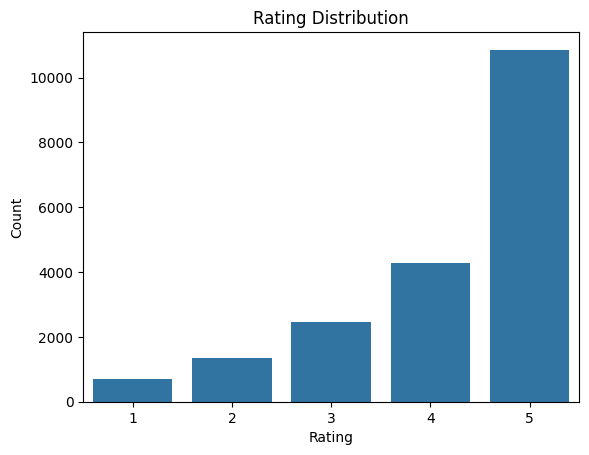

   rating  count
0       5  10858
1       1    691
2       3   2464
3       2   1360
4       4   4289


In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
spark = SparkSession.builder.appName("Visualize").getOrCreate()

rating_counts = df_cleaned.groupBy("rating").count().toPandas()

sns.barplot(x='rating', y='count', data=rating_counts)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()
print(rating_counts)

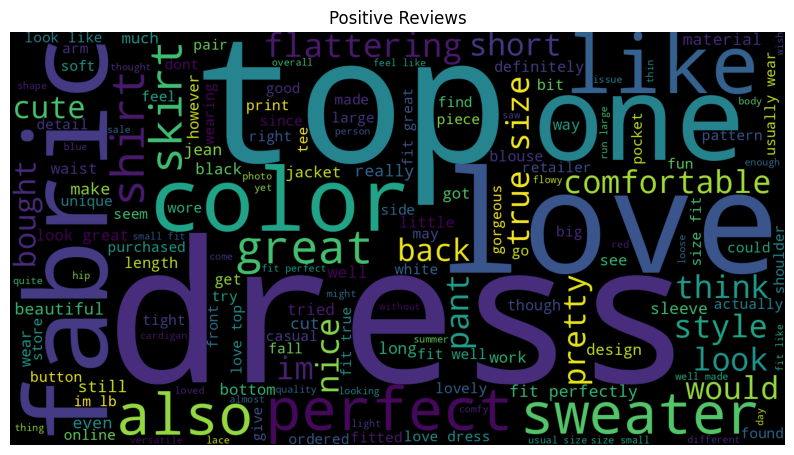

In [ ]:
from pyspark.sql import SparkSession
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tạo Spark session
spark = SparkSession.builder.appName("WordCloud for Reviews").getOrCreate()

# Giả sử df_cleaned là DataFrame PySpark của bạn
# df_cleaned = spark.read.option("header", "true").csv("your_file.csv")

# Lọc các đánh giá tích cực (rating >= 4) và tiêu cực (rating <= 2)
pos_reviews_df = df_cleaned.filter(df_cleaned['rating'] >= 4)
neg_reviews_df = df_cleaned.filter(df_cleaned['rating'] <= 2)

# Chuyển đổi dữ liệu sang pandas để có thể sử dụng với WordCloud
pos_reviews = pos_reviews_df.select("review_text").rdd.map(lambda row: row.review_text).collect()
neg_reviews = neg_reviews_df.select("review_text").rdd.map(lambda row: row.review_text).collect()

# Chuyển các danh sách review thành một chuỗi văn bản
pos_text = " ".join(pos_reviews)
neg_text = " ".join(neg_reviews)

# Tạo WordCloud cho các đánh giá tích cực
stop_words = set(stopwords.words('english'))
pos_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                          stopwords=stop_words,
                          min_font_size=15).generate(pos_text)

# Vẽ WordCloud cho các đánh giá tích cực
plt.figure(figsize=(10, 10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')  # Tắt các trục
plt.show()

(-0.5, 1499.5, 799.5, -0.5)

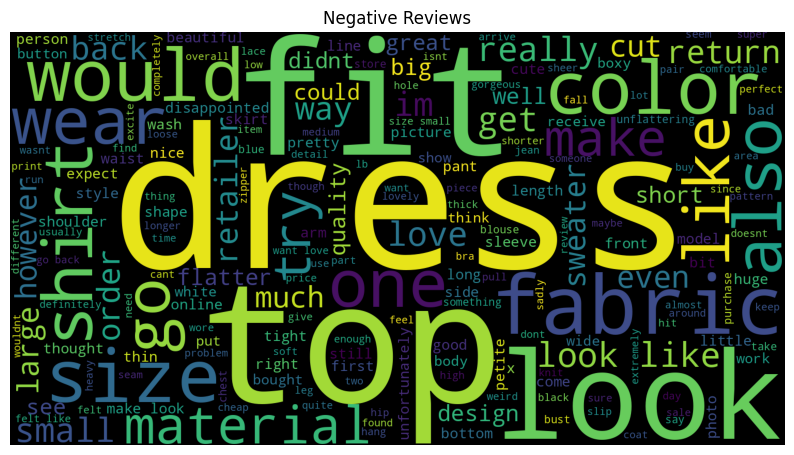

In [ ]:
neg_wordcloud = WordCloud(width=1500, height=800,
                          background_color='black',
                          stopwords=stop_words,
                          min_font_size=15).generate(neg)

plt.figure(figsize=(10, 10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')

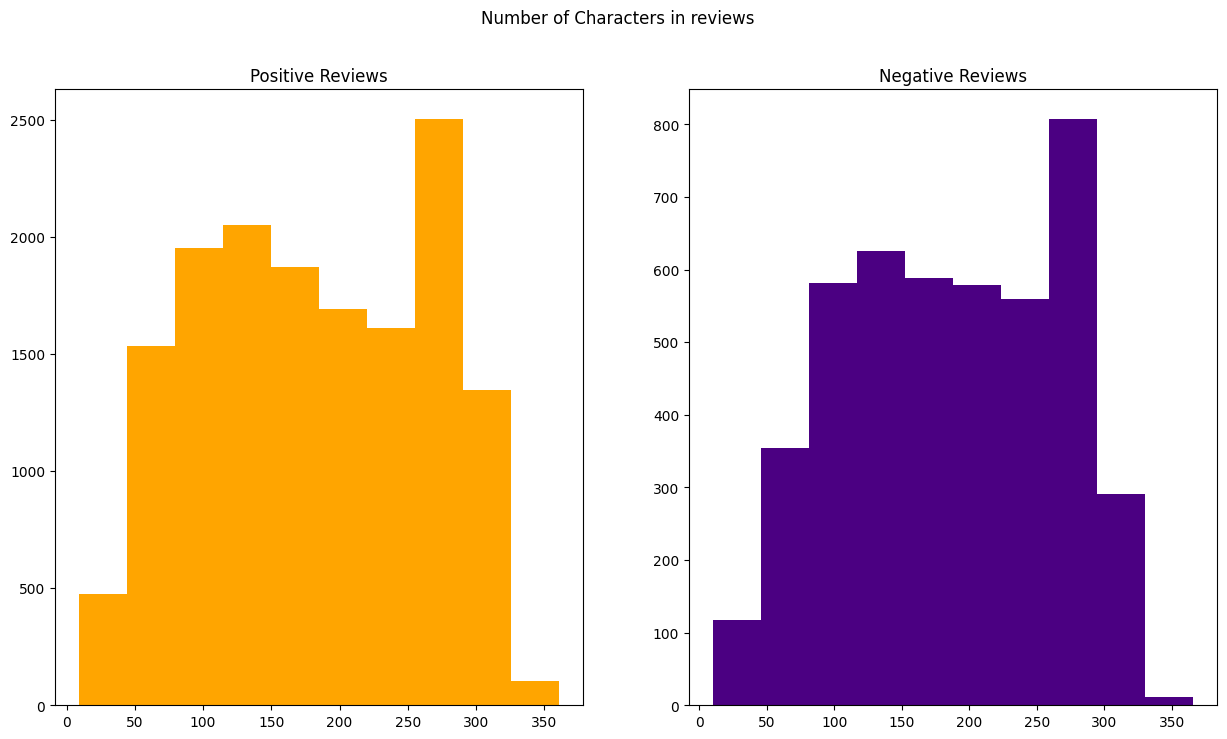

In [ ]:
# Visualization of number of character in reviews
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))

len_pos_review = df_cleaned[df_cleaned['rating'] >= 4]['review_text'].str.len()
pos_ax.hist(len_pos_review, color='orange')
pos_ax.set_title('Positive Reviews')

len_neg_review = df_cleaned[df_cleaned['rating'] <= 3]['review_text'].str.len()
neg_ax.hist(len_neg_review, color='#4B0082')
neg_ax.set_title('Negative Reviews')

figure.suptitle('Number of Characters in reviews')
plt.show()

Trục x cho biết được độ dài của các review

Trục y đại diện cho frequency

<ipython-input-31-d0d0a13beeab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_word.map(lambda x: np.mean(x)), ax=pos_ax, color='green')
<ipython-input-31-d0d0a13beeab>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_word.map(lambda x: np.mean(x)), ax=neg_ax, color='red')


Text(0.5, 0.98, 'Average word length in Reviews')

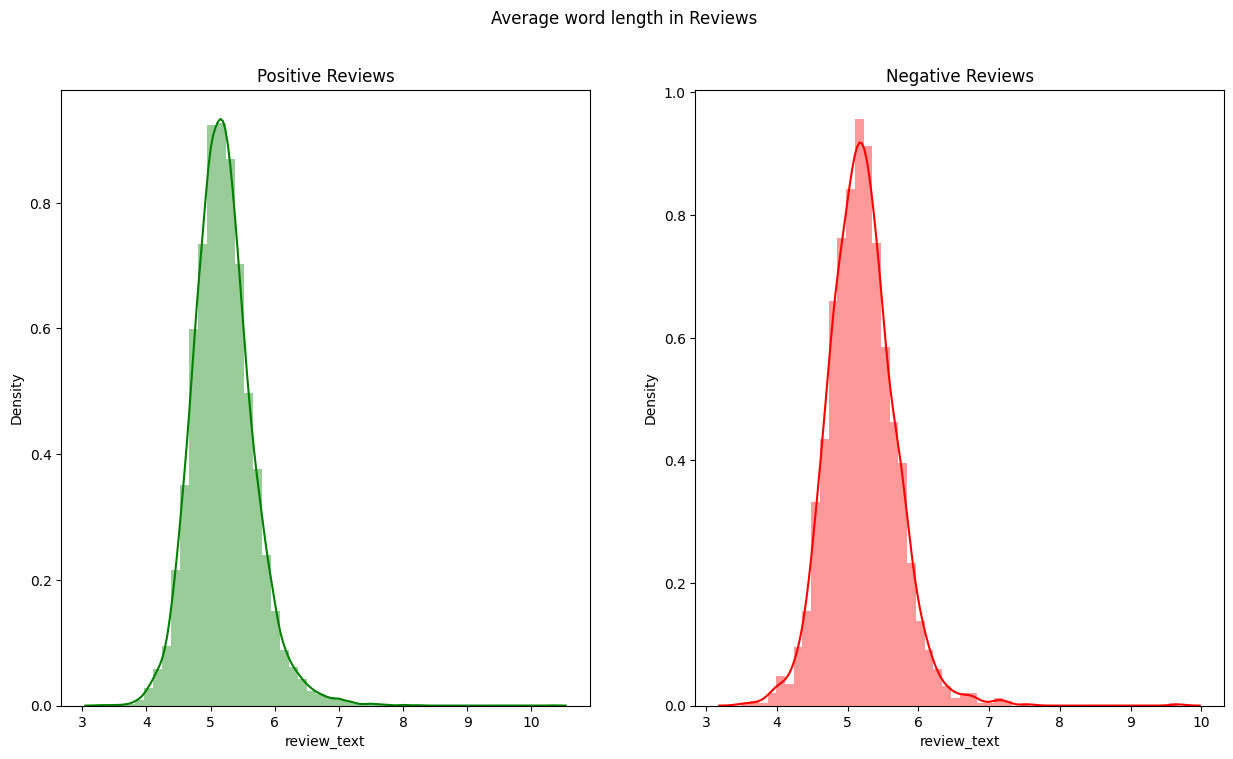

In [ ]:
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))

pos_word = df_cleaned[df_cleaned['rating'] >= 3]['review_text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)), ax=pos_ax, color='green')
pos_ax.set_title('Positive Reviews')

neg_word = df_cleaned[df_cleaned['rating'] <= 2]['review_text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)), ax=neg_ax, color='red')
neg_ax.set_title('Negative Reviews')

figure.suptitle('Average word length in Reviews')

Ý nghĩa visualize bên trên:

- Các review tích cực có xu hướng dùng từ ngắn hay dài hơn?
- Các review tiêu cực thường dùng từ đơn giản hay phức tạp?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
def get_top_text_ngrams(corpus, n, g):
    """
    Hàm tìm n từ hoặc cụm từ (n-gram) xuất hiện nhiều nhất trong một tập hợp văn bản.

    Args:
        corpus: Tập hợp văn bản (ví dụ: một danh sách các chuỗi).
        n: Số lượng từ hoặc cụm từ cần tìm.
        g: Độ dài của n-gram (ví dụ: g=1 cho từ đơn, g=2 cho bigram).

    Returns:
        Danh sách các tuple (từ/cụm từ, tần số) được sắp xếp theo tần số giảm dần.
    """

    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Tìm 20 từ đơn xuất hiện nhiều nhất trong các đánh giá tích cực
most_common_uni = get_top_text_ngrams(df_cleaned.review_text[df['rating'] >= 4], 20, 1)
most_common_uni = dict(most_common_uni)

# Tạo DataFrame để vẽ biểu đồ
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

# Vẽ biểu đồ cột
fig = px.bar(temp, x="Count", y="Common_words", title='Common Words in Positive Reviews', orientation="h",
             width=700, height=700, color="Common_words")
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df_cleaned.review_text[df_cleaned['rating'] >= 4], 20, 2)
most_common_uni = dict(most_common_uni)

temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

fig = px.bar(temp, x="Count", y="Common_words", title='Common bigram in Positive Reviews',
             orientation="h", width=700, height=700, color="Common_words")
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df_cleaned.review_text[df_cleaned['rating'] >= 4], 20, 3)
most_common_uni = dict(most_common_uni)

temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

fig = px.bar(temp, x="Count", y="Common_words", title='Common trigram in Positive Reviews',
             orientation="h", width=700, height=700, color="Common_words")
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df_cleaned.review_text[df['rating'] <= 2], 20, 1)
most_common_uni = dict(most_common_uni)

# Tạo DataFrame để vẽ biểu đồ
temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

# Vẽ biểu đồ cột
fig = px.bar(temp, x="Count", y="Common_words", title='Common Words in Negative Reviews', orientation="h",
             width=700, height=700, color="Common_words")
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df_cleaned.review_text[df_cleaned['rating'] <= 2], 20, 2)
most_common_uni = dict(most_common_uni)

temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

fig = px.bar(temp, x="Count", y="Common_words", title='Common bigram in Negative Reviews',
             orientation="h", width=700, height=700, color="Common_words")
fig.show()

In [ ]:
most_common_uni = get_top_text_ngrams(df_cleaned.review_text[df_cleaned['rating'] <= 1], 20, 3)
most_common_uni = dict(most_common_uni)

temp = pd.DataFrame(columns=["Common_words", "Count"])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())

fig = px.bar(temp, x="Count", y="Common_words", title='Common trigram in Negative Reviews',
             orientation="h", width=700, height=700, color="Common_words")
fig.show()

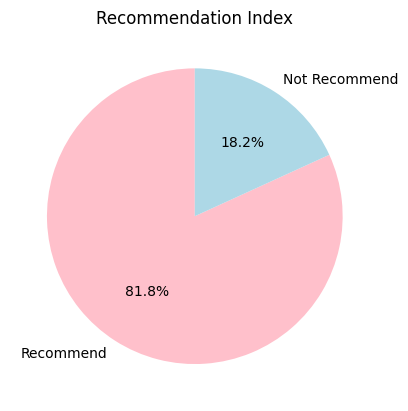

In [ ]:
df_cleaned['recommend_index'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'], labels=['Recommend', 'Not Recommend'])
plt.title('Recommendation Index')
plt.ylabel('')
plt.show()

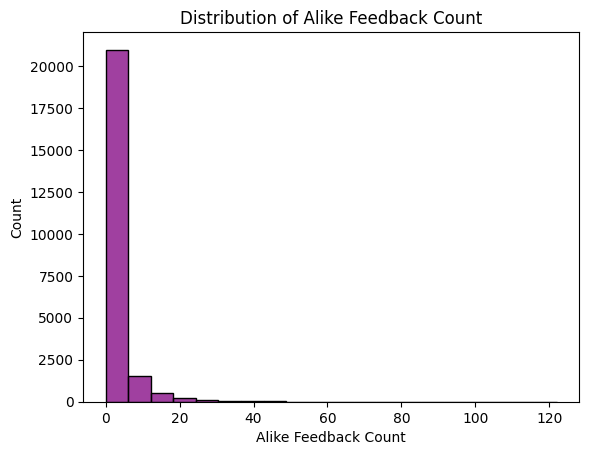

In [ ]:
sns.histplot(df['alike_feedback_count'], kde=False, color='purple', bins=20)
plt.title('Distribution of Alike Feedback Count')
plt.xlabel('Alike Feedback Count')
plt.ylabel('Count')
plt.show()

In [ ]:
avg_rating_by_class = df.groupby('class_name')['rating'].mean().reset_index()
avg_rating_by_class = avg_rating_by_class.sort_values(by='rating', ascending=False)
avg_rating_by_class.set_index('class_name', inplace=True)

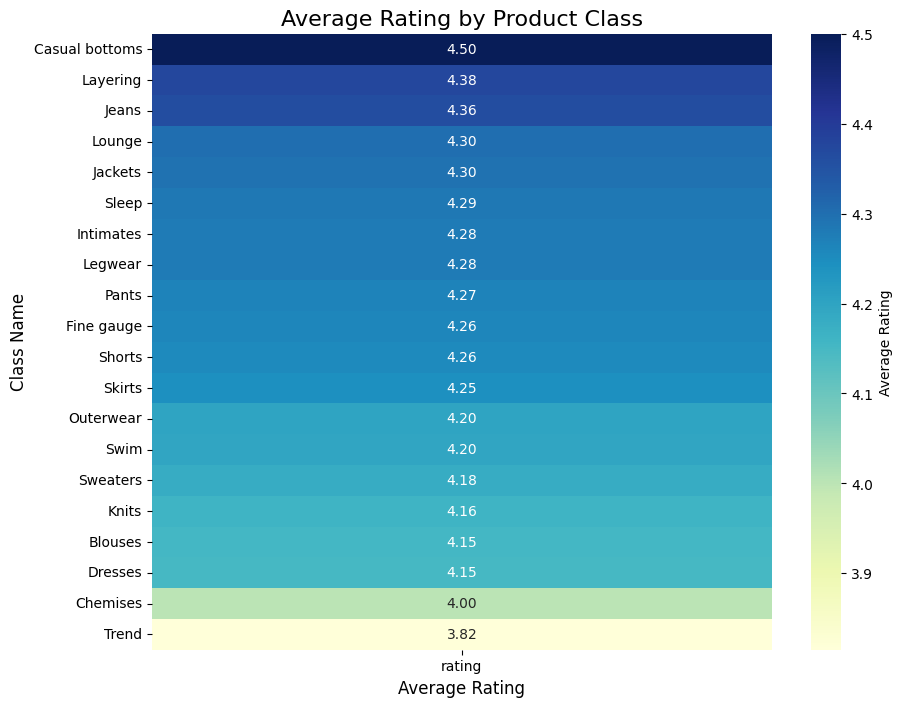

In [ ]:
plt.figure(figsize=(10, 8))

# Vẽ heatmap
sns.heatmap(avg_rating_by_class, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Average Rating'})
plt.title('Average Rating by Product Class', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Class Name', fontsize=12)
plt.show()

Hiểu loại sản phẩm nào được đánh giá cao nhất/thấp nhất:

- Dựa vào class_name, bạn sẽ xác định được loại sản phẩm nào thường nhận được đánh giá tích cực (cao) hoặc tiêu cực (thấp).
- Điều này giúp phát hiện vấn đề: Có phải một số loại sản phẩm không được yêu thích hoặc gặp vấn đề về chất lượng?
- Đồng thời giúp bạn tập trung vào các sản phẩm nổi bật hơn để tăng doanh số.